<a href="https://colab.research.google.com/github/PARULCHUTANIPC/YOLO/blob/YOLO-V8/Bogie_Detection_using_YOLO_V8_%2B_Bogie_Segmentation_using_SAM_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.2/78.2 GB disk)


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from ultralytics import YOLO

from IPython.display import display, Image

# Training on Custom Dataset

In [6]:
%cd /content/drive/MyDrive/bogie dataset

/content/drive/MyDrive/bogie dataset


In [7]:
!pwd

/content/drive/MyDrive/bogie dataset


In [8]:
!yolo task=detect mode=train model=yolov8n.pt data= bogie.yaml epochs=50 imgsz=224 plots=True

Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=bogie.yaml, epochs=50, patience=50, batch=16, imgsz=224, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, workspace

In [6]:
%cd "/content/drive/MyDrive/bogie dataset"

/content/drive/MyDrive/bogie dataset


In [7]:
!pwd

/content/drive/MyDrive/bogie dataset


# Prediction - using cmd

In [23]:
!yolo task=detect mode=predict model=runs/detect/train2/weights/best.pt source="/content/bogie.jpg" save=True

2023-04-18 10:08:00.986617: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
image 1/1 /content/bogie.jpg: 192x224 1 Bogie, 44.8ms
Speed: 0.3ms pre-process, 44.8ms inference, 82.3ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs/detect/predict6


In [20]:
z = !yolo task=detect mode=predict model=runs/detect/train2/weights/best.pt source="/content/bogie.jpg" save=True

# Prediction - Python

In [24]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
import pickle
import pandas as pd

In [4]:
im = cv2.imread('/content/bogie.jpg')

In [30]:
model = YOLO('runs/detect/train2/weights/best.pt')

In [31]:
results = model.predict(source='/content/bogie.jpg', conf=0.25)
results[0].boxes.xyxy

Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


tensor([[  2.,  93., 548., 367.]], device='cuda:0')

In [32]:
results[0].boxes.cls

tensor([0.], device='cuda:0')

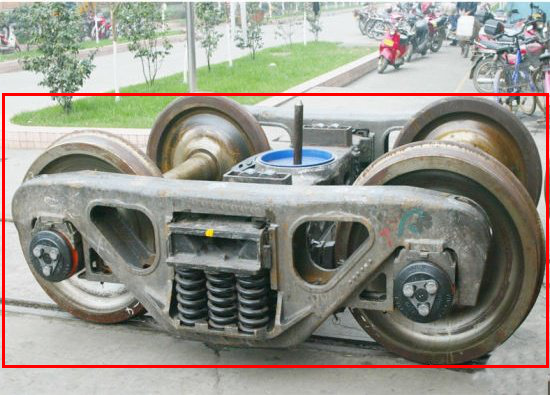

In [35]:
draw = ImageDraw.Draw(image)

draw.rectangle((2, 93, 548, 367), outline='red', width=3)

image.show()

# Prediction for multiple images

In [36]:
results = model.predict(source='/content/drive/MyDrive/bogie dataset/test/images', conf=0.25)

In [41]:
results[0].boxes.xyxy, results[1].boxes.xyxy, results[2].boxes.xyxy, results[3].boxes.xyxy, results[4].boxes.xyxy

(tensor([[ 10.,  86., 364., 207.]], device='cuda:0'),
 tensor([[ 12.,  50., 242., 132.]], device='cuda:0'),
 tensor([[ 61., 145., 742., 329.]], device='cuda:0'),
 tensor([[  8.,  58., 256., 150.]], device='cuda:0'),
 tensor([[ 12.,  50., 242., 132.]], device='cuda:0'))

In [43]:
import glob
from IPython.display import Image, display

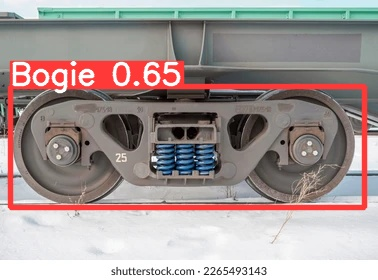

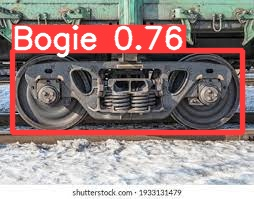

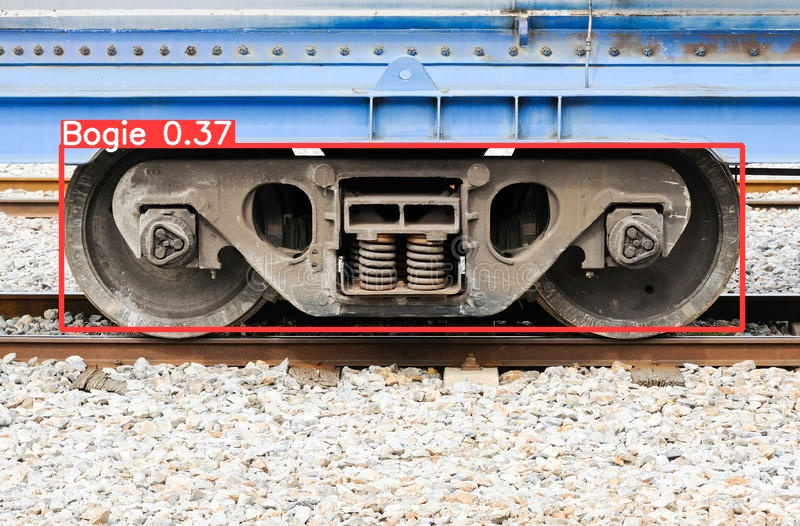

In [44]:
for image_path in glob.glob(f'/content/drive/MyDrive/bogie dataset/runs/detect/predict/*.jpg')[:3]:
  display(Image(filename = image_path, height = 600))


In [45]:
from PIL import Image, ImageDraw

In [49]:
results[0].boxes.xyxy, results[0].boxes.xyxy[0][0]

(tensor([[ 10.,  86., 364., 207.]], device='cuda:0'),
 tensor(10., device='cuda:0'))

10 364 86 207


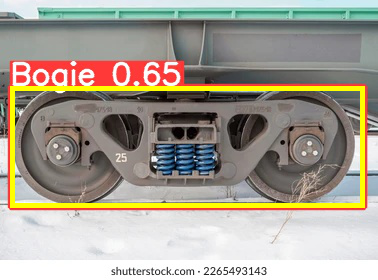

In [82]:
# for image_path in glob.glob(f'/content/drive/MyDrive/bogie dataset/runs/detect/predict/46.jpg')[:3]:
  
image = Image.open('/content/drive/MyDrive/bogie dataset/runs/detect/predict/46.jpg')

draw = ImageDraw.Draw(image)

x1 = int(results[0].boxes.xyxy[0][0])
y1 = int(results[0].boxes.xyxy[0][1])
x2 = int(results[0].boxes.xyxy[0][2])
y2 = int(results[0].boxes.xyxy[0][3])

print(x1,x2,y1,y2)
draw.rectangle((x1,y1,x2,y2), outline = 'yellow', width = 5)
image.show()

In [84]:
cropped_img = image.crop((x1,y1,x2,y2))

In [92]:
!pwd

/content/drive/MyDrive/bogie dataset


In [91]:
cropped_img.save("cropped_img.jpg")

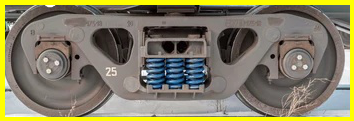

In [85]:
cropped_img.show()

In [ ]:
from PIL import Image, ImageDraw
image = Image.open('/content/bogie.jpg')

draw = ImageDraw.Draw(image)

x1 = int(z2[0])
x2 = int(z2[2])
y1 = int(z2[1])+x1
y2 = int(z2[3].split(')')[0])
print(x1,x2,y1,y2)
draw.rectangle((x1, y1, x2, y2), outline='red', width=3)

image.show()

# Segmentation

## Environment Set-up

In [60]:
from IPython.display import display, HTML
display(HTML(
"""
<a target="_blank" href="https://colab.research.google.com/github/facebookresearch/segment-anything/blob/main/notebooks/predictor_example.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>
"""
))

In [61]:
using_colab = True

In [62]:
if using_colab:
    import torch
    import torchvision
    print("PyTorch version:", torch.__version__)
    print("Torchvision version:", torchvision.__version__)
    print("CUDA is available:", torch.cuda.is_available())
    import sys
    !{sys.executable} -m pip install opencv-python matplotlib
    !{sys.executable} -m pip install 'git+https://github.com/facebookresearch/segment-anything.git'
    
    !mkdir images
    !wget -P images https://raw.githubusercontent.com/facebookresearch/segment-anything/main/notebooks/images/truck.jpg
    !wget -P images https://raw.githubusercontent.com/facebookresearch/segment-anything/main/notebooks/images/groceries.jpg
        
    !wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

PyTorch version: 2.0.0+cu118
Torchvision version: 0.15.1+cu118
CUDA is available: True
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-zezf_o4_
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-zezf_o4_
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 567662b0fd33ca4b022d94d3b8de896628cd32dd
  Preparing metadata (setup.py) ... done
  Created wheel for segment-anything: filename=segment_anything-1.0-py3-none-any.whl size=36610 sha256=7388477f0382e70ef82dccf4da7e12baaacbec1f5359be68b64f1143ca8ae173
  Stored in directory: /tmp/pip-ephem-wheel-cache-nk11zpiu/wheels/d5/11/03/7aca746a2c0e09f279b10436ced7175926bc38f650b736a648
Successfully built segm

## SET UP -- Necessary imports and helper functions for displaying points, boxes, and masks.

In [63]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

In [64]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))

In [67]:
image = cv2.imread('/content/drive/MyDrive/bogie dataset/test/images/46.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [66]:
#10 364 86 207

In [68]:
import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamPredictor

sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

predictor = SamPredictor(sam)

In [73]:
input_box = np.array([10, 86, 364, 207])

In [74]:
predictor.set_image(image)

In [75]:
masks, _, _ = predictor.predict(
    point_coords=None,
    point_labels=None,
    box=input_box[None, :],
    multimask_output=False,
)

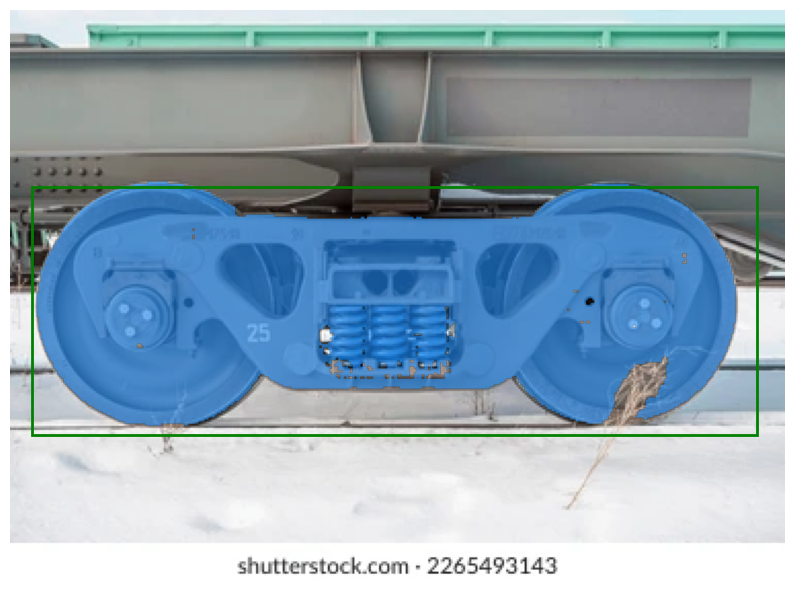

In [76]:
plt.figure(figsize=(10, 10))
plt.imshow(image)
show_mask(masks[0], plt.gca())
show_box(input_box, plt.gca())
plt.axis('off')
plt.show()

In [ ]:
z = !yolo task=detect mode=predict model=runs/detect/train4/weights/best.pt source="/content/car2.jpg"

In [ ]:
z

['2023-04-17 11:57:34.008870: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.',
 'To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.',
 '2023-04-17 11:57:34.830404: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT',
 'Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)',
 'Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs',
 'image 1/1 /content/car2.jpg: 160x224 55.6ms',
 'Speed: 0.3ms pre-process, 55.6ms inference, 10.6ms postprocess per image at shape (1, 3, 224, 224)']

In [ ]:
z1 = z[6]

In [ ]:
start = int(z1.index('('))+1
end = z1.index(')')
start, end

(83, 97)

In [ ]:
z2 = z1[start:end].split(',')
z2

['1', ' 3', ' 224', ' 224']

In [34]:
from PIL import Image, ImageDraw
image = Image.open('/content/bogie.jpg')

1 224 4 224


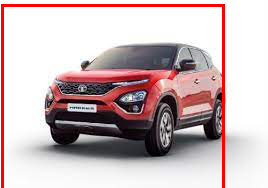

In [ ]:
draw = ImageDraw.Draw(image)

x1 = int(z2[0])
x2 = int(z2[2])
y1 = int(z2[1])+x1
y2 = int(z2[3].split(')')[0])
print(x1,x2,y1,y2)
draw.rectangle((x1, y1, x2, y2), outline='red', width=3)

image.show()

# Basic Segmentation

In [77]:
import torch
import torchvision
print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
print("CUDA is available:", torch.cuda.is_available())

PyTorch version: 2.0.0+cu118
Torchvision version: 0.15.1+cu118
CUDA is available: True


In [78]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

import sys
sys.path.append("..")


In [79]:
pip install 'git+https://github.com/facebookresearch/segment-anything.git'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-630yp2rd
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-630yp2rd
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 567662b0fd33ca4b022d94d3b8de896628cd32dd
  Preparing metadata (setup.py) ... done


In [80]:
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

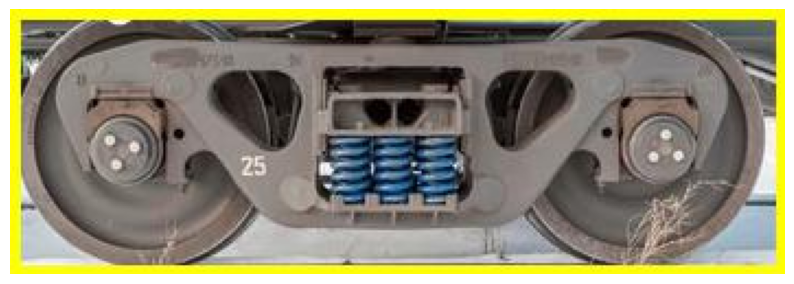

In [94]:
image1 = cv2.imread('/content/drive/MyDrive/bogie dataset/cropped_img.jpg')  #Try houses.jpg or neurons.jpg
image1 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))
plt.imshow(image)
plt.axis('off')
plt.show()

In [86]:
sam_checkpoint = "/content/drive/MyDrive/sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

Sam(
  (image_encoder): ImageEncoderViT(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 1280, kernel_size=(16, 16), stride=(16, 16))
    )
    (blocks): ModuleList(
      (0-31): 32 x Block(
        (norm1): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=1280, out_features=3840, bias=True)
          (proj): Linear(in_features=1280, out_features=1280, bias=True)
        )
        (norm2): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (lin1): Linear(in_features=1280, out_features=5120, bias=True)
          (lin2): Linear(in_features=5120, out_features=1280, bias=True)
          (act): GELU(approximate='none')
        )
      )
    )
    (neck): Sequential(
      (0): Conv2d(1280, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): LayerNorm2d()
      (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (3): LayerNorm2d

In [95]:
mask_generator_ = SamAutomaticMaskGenerator(
    model=sam,
    points_per_side=32,
    pred_iou_thresh=0.9,
    stability_score_thresh=0.96,
    crop_n_layers=1,
    crop_n_points_downscale_factor=2,
    min_mask_region_area=100,  # Requires open-cv to run post-processing
)

masks = mask_generator_.generate(image1)

print(len(masks))

60


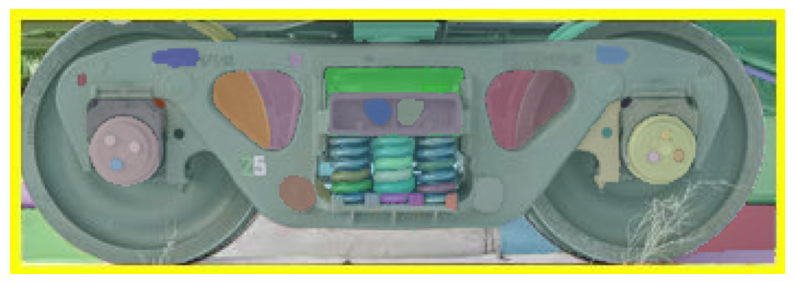

In [97]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)
    polygons = []
    color = []
    for ann in sorted_anns:
      m = ann['segmentation']
      img = np.ones((m.shape[0], m.shape[1], 3))
      color_mask = np.random.random((1, 3)).tolist()[0]
      for i in range(3):
          img[:,:,i] = color_mask[i]
      ax.imshow(np.dstack((img, m*0.35)))

plt.figure(figsize=(10,10))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show() 